## Day 3 Homework -- Analysis in python

1. import plotnine as p9, scipy stats, pandas as pd, and numpy as np 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotnine as p9
from scipy import stats

You can get the "Iris" dataset <https://en.wikipedia.org/wiki/Iris_flower_data_set> from the `day3/data` directory. 
- Load it into pandas as we did the TB dataset previously. 
- Show the top 5 lines of the dataset.

In [4]:
irisraw=pd.read_csv('/home/timp/bcmb_bootcamp/day3/data/iris.csv')

In [8]:
irisraw.sort_values(by=['sepal.length','sepal.width'],ascending=False).head()

,sepal.length,sepal.width,petal.length,petal.width,variety
131,7.9,3.8,6.4,2.0,Virginica
117,7.7,3.8,6.7,2.2,Virginica
135,7.7,3.0,6.1,2.3,Virginica
122,7.7,2.8,6.7,2.0,Virginica
118,7.7,2.6,6.9,2.3,Virginica


2. Plot the petal length of each species as a boxplot and a dotplot

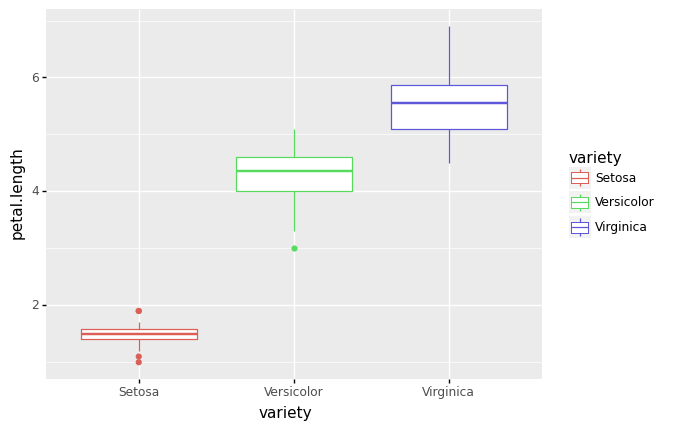

In [9]:
print(p9.ggplot(data=irisraw,mapping=p9.aes(x='variety', y='petal.length', color='variety'))+p9.geom_boxplot())

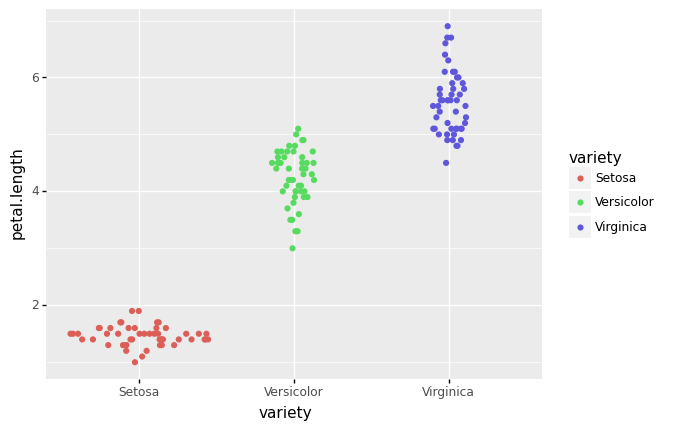

In [10]:
print(p9.ggplot(data=irisraw,mapping=p9.aes(x='variety', y='petal.length', color='variety'))+p9.geom_sina())

3. Is there a statistically sigificant difference in petal length between setosa and versicolor, what about versicolor and virginica?

In [12]:
print(stats.ttest_ind(irisraw[irisraw['variety']=='Setosa']['petal.length'], irisraw[irisraw['variety']=='Versicolor']['petal.length']))

Ttest_indResult(statistic=-39.492719391538095, pvalue=5.404910513441677e-62)


In [13]:
print(stats.ttest_ind(irisraw[irisraw['variety']=='Setosa']['petal.length'], irisraw[irisraw['variety']=='Virginica']['petal.length']))

Ttest_indResult(statistic=-49.98618625709594, pvalue=1.5048006992427275e-71)


4. Generate all possible combinations of scatter plots (i.e. all variables versus each other) colored by variety.

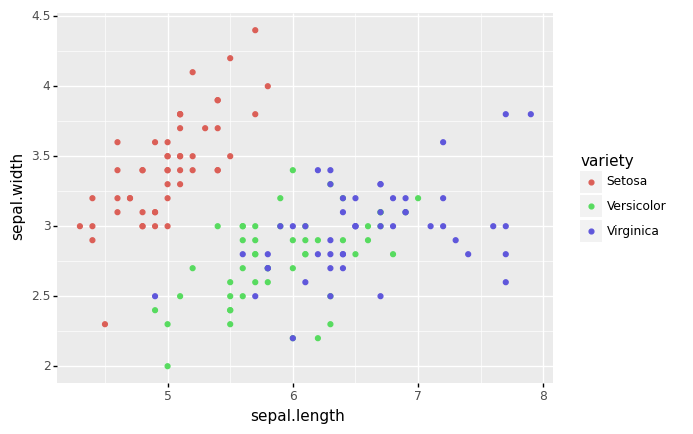

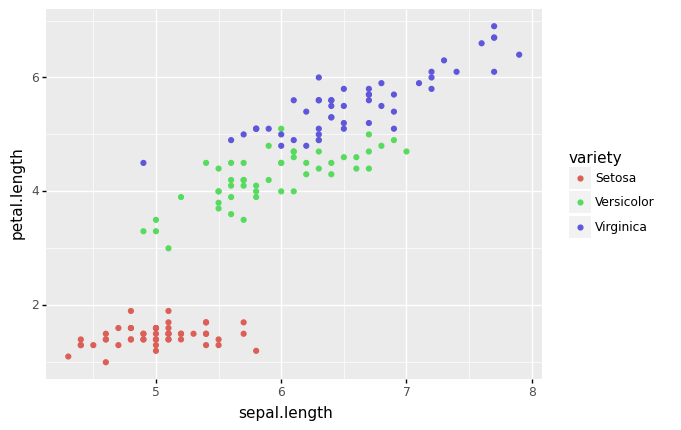

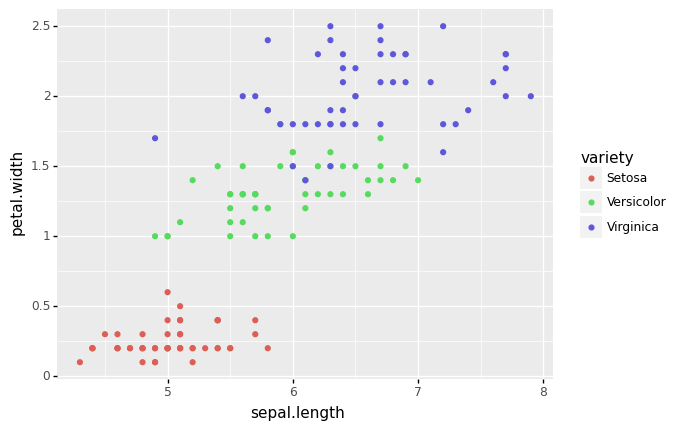

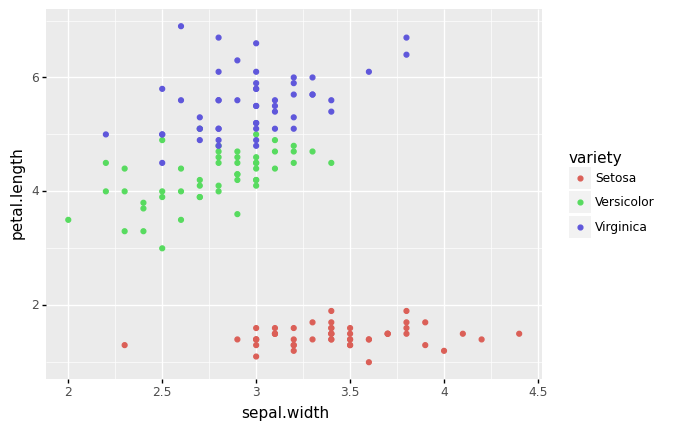

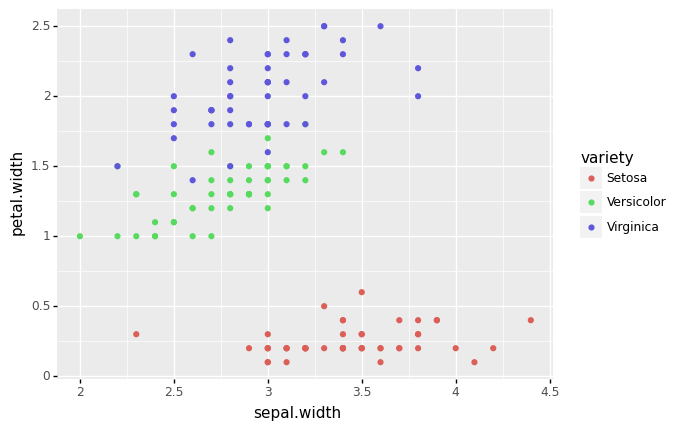

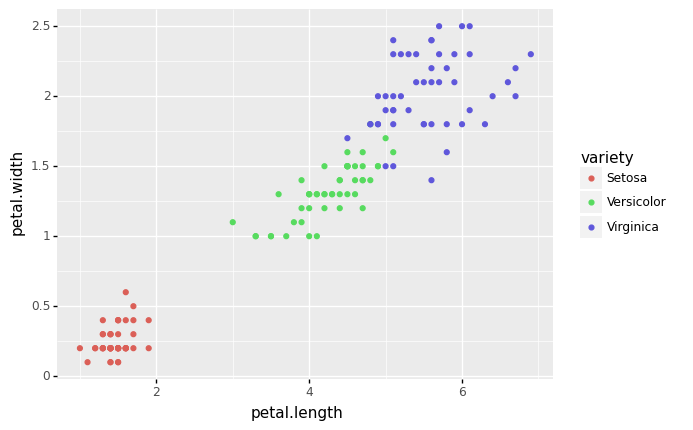

In [19]:
for i in range(0, len(irisraw.columns)-2):
    for j in range(i+1, len(irisraw.columns)-1):
        #print(irisraw.columns[i],irisraw.columns[j])
        print(p9.ggplot(data=irisraw,mapping=p9.aes(x=irisraw.columns[i], y=irisraw.columns[j], color='variety'))+p9.geom_point())

5. Write a for loop to test if each flower measurement is a normal distribution. If the distribution is normal print the p-value, if the distribution is not normal print "Distribution not normal!" (hint scipy has a normaltest function https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html)

In [21]:
flowerlist=['petal.length','petal.width', 'sepal.length', 'sepal.width']
print(flowerlist)

['petal.length', 'petal.width', 'sepal.length', 'sepal.width']


In [36]:
for i in flowerlist:
    array=np.array(irisraw[i])
    #print(array)
    x=stats.normaltest(array)
    check=x.pvalue
    if (check > .05):
        print('Distribution is not normal')
    else:
        print(check)

7.264667501338673e-49
1.3492785927137586e-30
Distribution is not normal
Distribution is not normal


6. Generate a correlation matrix between the iris variables, plot it as a heatmap with the axes labelled (Hint pandas has a correlation function https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.corr.html) Does the plot look different when you change the correlation method?

In [78]:
import seaborn as sn

df=irisraw.corr()
df

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [55]:
versi=irisraw[irisraw['variety']=="Versicolor"]

In [57]:
versidf=versi.corr()

<AxesSubplot:>

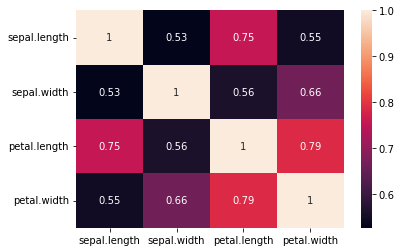

In [59]:
sn.heatmap(versidf, annot=True)

In [66]:
irisraw['variety'].unique().tolist()

['Setosa', 'Versicolor', 'Virginica']

Setosa


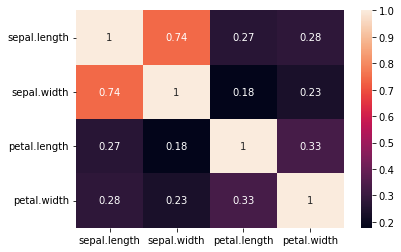

Versicolor


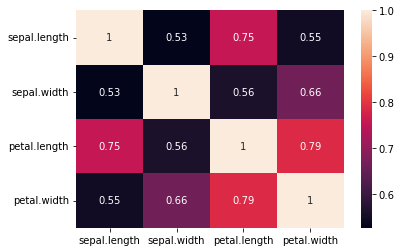

Virginica


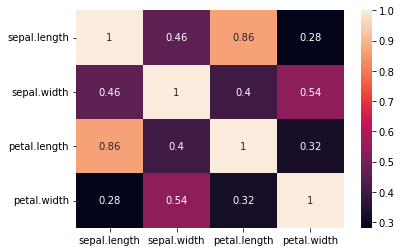

In [73]:
for i in irisraw['variety'].unique().tolist():
    print(i)
    tempcorr=irisraw[irisraw['variety']==i].corr()
    sn.heatmap(tempcorr, annot=True)
    plt.show()

In [80]:
mydf=irisraw.corr()

In [81]:
mydf

,sepal.length,sepal.width,petal.length,petal.width
sepal.length,1.000000,-0.117570,0.871754,0.817941
sepal.width,-0.117570,1.000000,-0.428440,-0.366126
petal.length,0.871754,-0.428440,1.000000,0.962865
petal.width,0.817941,-0.366126,0.962865,1.000000


In [82]:
mydf['myidx']=mydf.index

In [83]:
mydf

,sepal.length,sepal.width,petal.length,petal.width,myidx
sepal.length,1.000000,-0.117570,0.871754,0.817941,sepal.length
sepal.width,-0.117570,1.000000,-0.428440,-0.366126,sepal.width
petal.length,0.871754,-0.428440,1.000000,0.962865,petal.length
petal.width,0.817941,-0.366126,0.962865,1.000000,petal.width


In [84]:
melty=mydf.melt(id_vars='myidx')

In [85]:
melty

,myidx,variable,value
0,sepal.length,sepal.length,1.000000
1,sepal.width,sepal.length,-0.117570
2,petal.length,sepal.length,0.871754
3,petal.width,sepal.length,0.817941
4,sepal.length,sepal.width,-0.117570
5,sepal.width,sepal.width,1.000000
6,petal.length,sepal.width,-0.428440
7,petal.width,sepal.width,-0.366126
8,sepal.length,petal.length,0.871754
9,sepal.width,petal.length,-0.428440


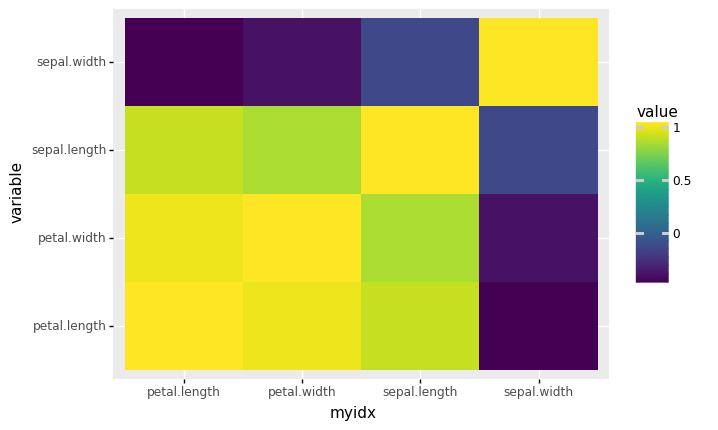

In [54]:
print(p9.ggplot(data=melty, mapping=p9.aes(x='myidx', y='variable', fill='value'))+p9.geom_tile())

<AxesSubplot:>

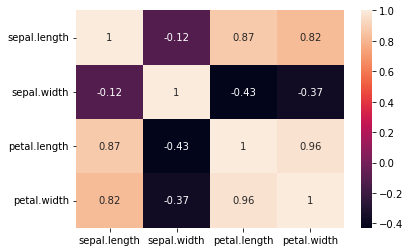

In [42]:
sn.heatmap(df, annot=True)

7. Repeat 4, but with linear fits to each scatter plot.

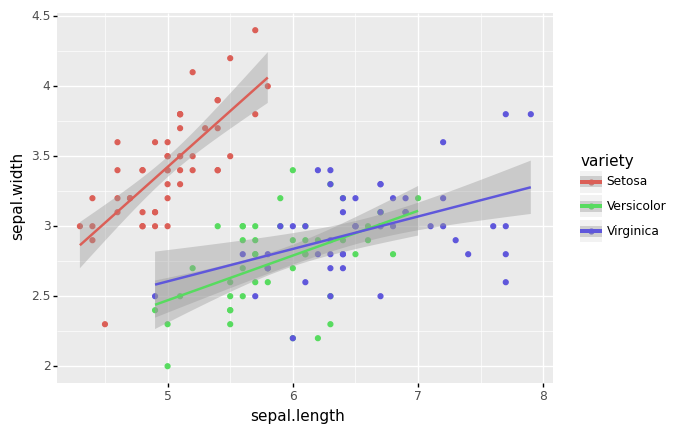

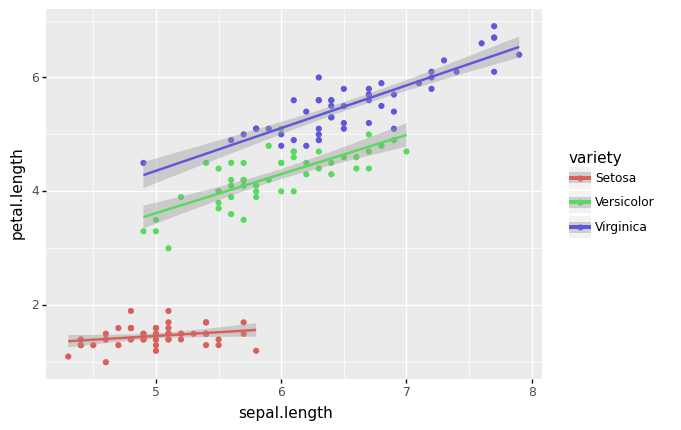

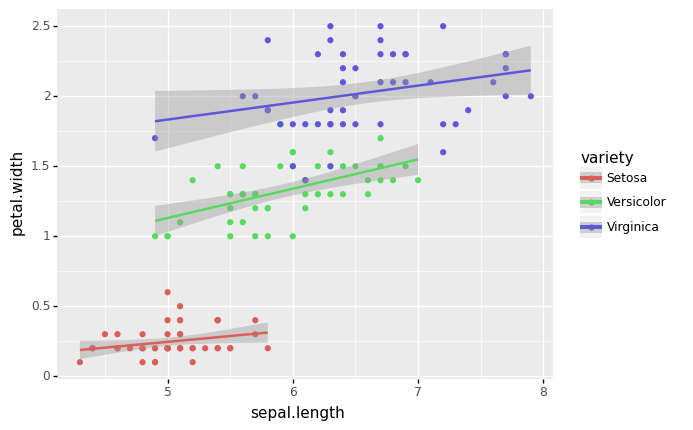

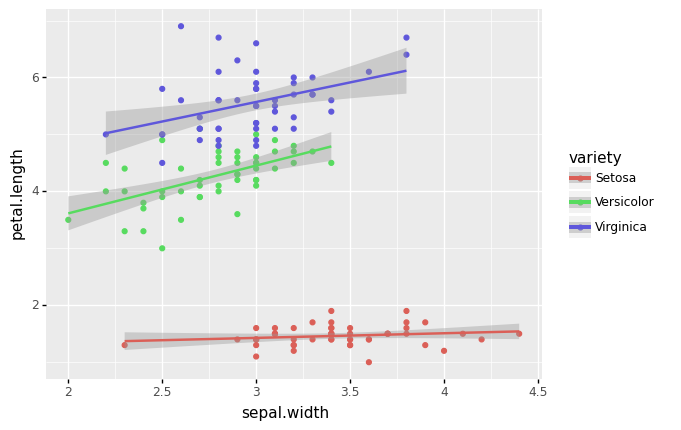

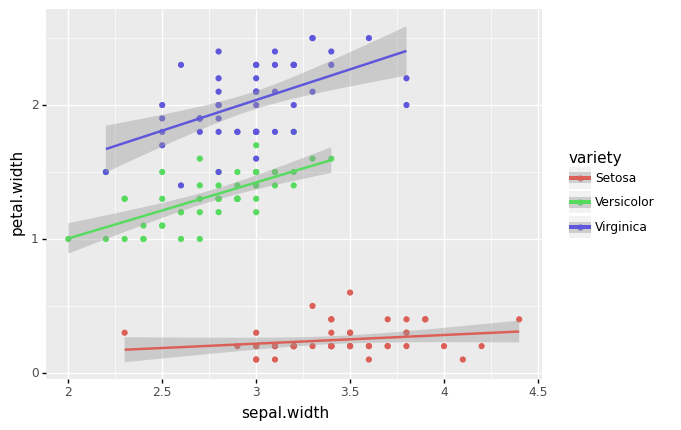

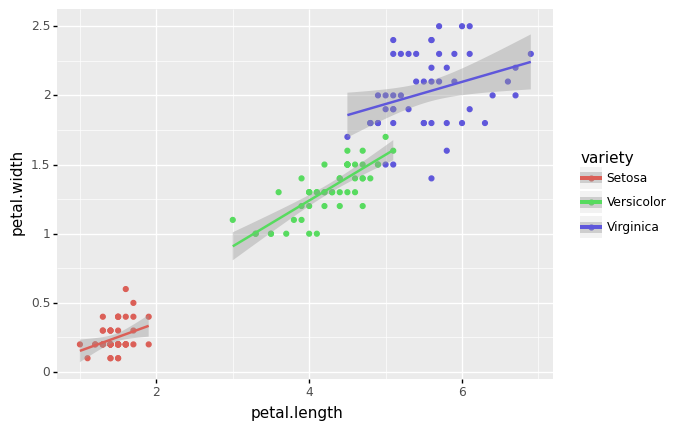

In [87]:
for i in range(0, len(irisraw.columns)-2):
    for j in range(i+1, len(irisraw.columns)-1):
        #print(irisraw.columns[i],irisraw.columns[j])
        print(p9.ggplot(data=irisraw,mapping=p9.aes(x=irisraw.columns[i], y=irisraw.columns[j], color='variety'))+p9.geom_point()+p9.geom_smooth(method='lm'))